<a href="https://colab.research.google.com/github/Muhaiminul-Hasan/Learning-TensorFlow/blob/main/02_Learning_Tensorflow_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
# tfds.disable_progress_bar

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset  = dataset['train']
test_dataset   = dataset['test']

In [ ]:
class_names = metadata.features['label'].names
for index, class_name in enumerate(class_names):
  print(index, ": ",class_name)

0 :  T-shirt/top
1 :  Trouser
2 :  Pullover
3 :  Dress
4 :  Coat
5 :  Sandal
6 :  Shirt
7 :  Sneaker
8 :  Bag
9 :  Ankle boot


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples  = metadata.splits['test'].num_examples

print("train_examples    test_examples\n", num_train_examples, "            ", num_test_examples)

train_examples    test_examples
 60000              10000


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# Apply normalize function to each element of the dataset
train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)

# Cache the dataset to train faster
train_dataset = train_dataset.cache()
test_dataset  = test_dataset.cache()

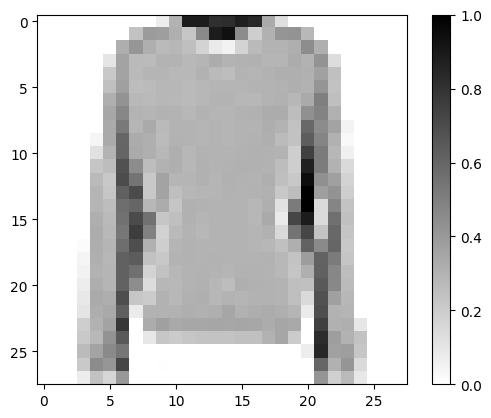

In [ ]:
# take the first image
for image, label in train_dataset.take(1):
  break
image = image.numpy().reshape(28, 28)

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

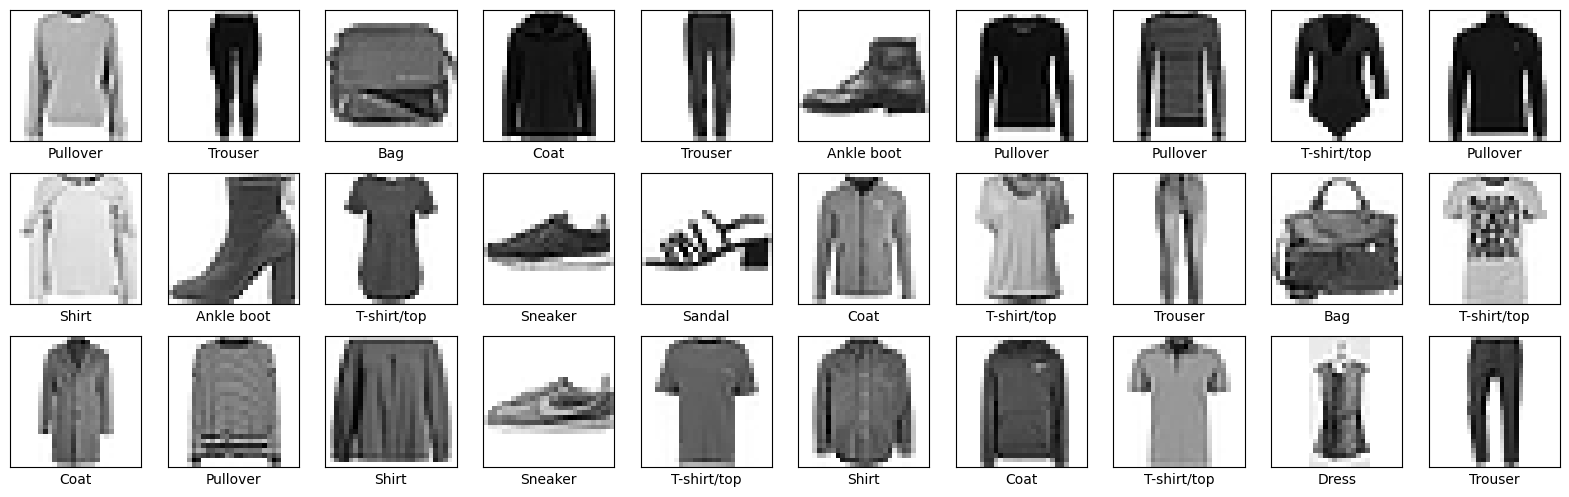

In [ ]:
plt.figure(figsize=(20, 6))
for i, (image, label) in enumerate(train_dataset.take(30)):
  plt.subplot(3, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = image.numpy().reshape(28, 28)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset  = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
l0 = tf.keras.layers.Flatten(input_shape=(28, 28, 1))
l1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
l2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

model = tf.keras.Sequential([l0, l1, l2])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              # optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1827 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1814 - accuracy: 0.9319
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1757 - accuracy: 0.9343
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1717 - accuracy: 0.9357
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1656 - accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1625 - accuracy: 0.9395
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1612 - accuracy: 0.9394
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1538 - accuracy: 0.9423
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1529 - accuracy: 0.9422
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.146

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8883


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print(test_images.shape)
print(test_labels.shape)
print(predictions.shape)

1/1 [==============================] - 0s 20ms/step
(32, 28, 28, 1)
(32,)
(32, 10)


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, image = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100 * np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="gray")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

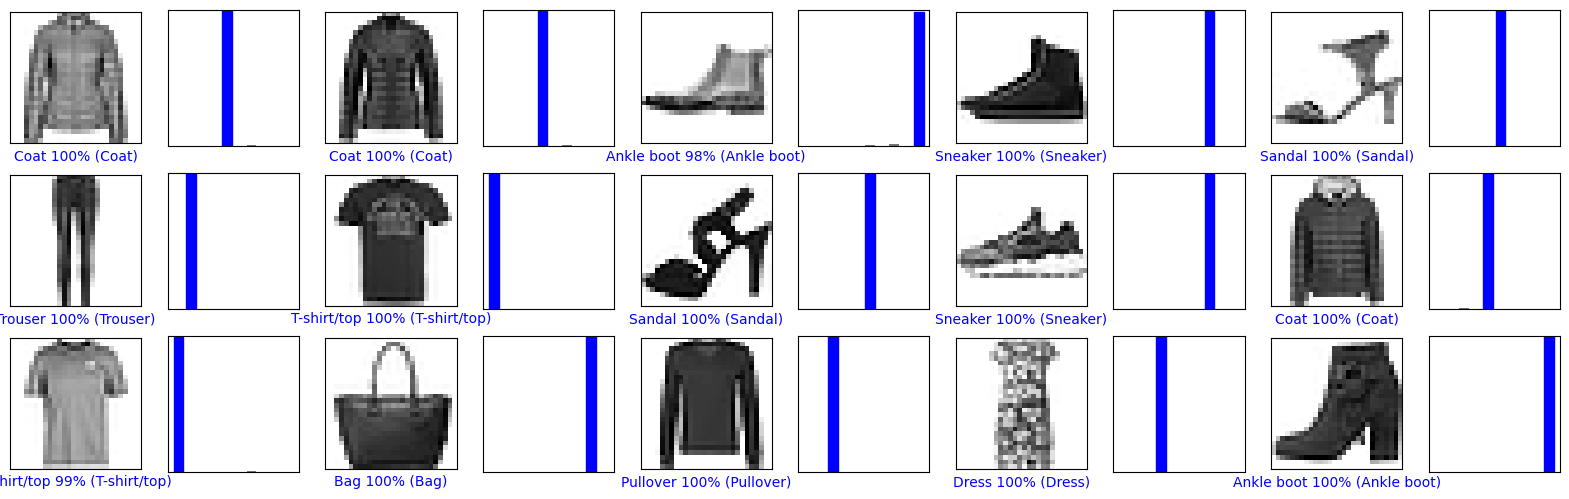

In [ ]:
num_rows = 3
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(20, 2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

1/1 [==============================] - 0s 26ms/step


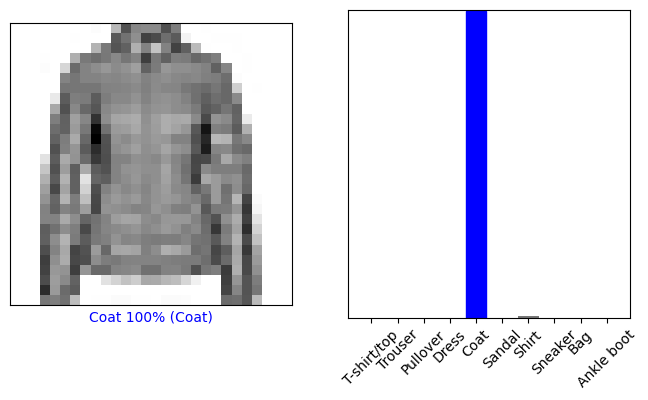

In [ ]:
# Grab an image from the test dataset
img = test_images[0]
img = np.array([img])   # Add the image to a batch where it's the only member.

predictions_single = model.predict(img)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(0, predictions_single, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)